In [4]:
from scripts.icd_tree import ICDTree
import pandas as pd


In [5]:
file_path = "ICD10.csv"
df = pd.read_csv(file_path, header=0)
df

,coding,meaning,node_id,parent_id,selectable
0,ICD10,ICD-10 Classification tree,0,NaN,N
1,Chapter I,Chapter I Certain infectious and parasitic dis...,1,0.0,N
2,Block A00-A09,A00-A09 Intestinal infectious diseases,23,1.0,N
3,A00,A00 Cholera,286,23.0,N
4,A000,"A00.0 Cholera due to Vibrio cholerae 01, biova...",287,286.0,Y
...,...,...,...,...,...
19150,Z992,Z99.2 Dependence on renal dialysis,19150,19147.0,Y
19151,Z993,Z99.3 Dependence on wheelchair,19151,19147.0,Y
19152,Z994,Z99.4 Dependence on artificial heart,19152,19147.0,Y
19153,Z998,Z99.8 Dependence on other enabling machines an...,19153,19147.0,Y


In [6]:
# Initialize the ICDTree
icd_tree = ICDTree(df)

In [7]:
import random

# Helper function to randomly select a node and print its details
def get_random_node():
    node_id = random.choice(list(icd_tree.graph.nodes))
    node_info = icd_tree.get_node_info(node_id)
    coding = node_info['coding']
    meaning = node_info['meaning']
    print(f"Randomly selected node: ID={node_id}, Coding={coding}, Meaning={meaning}")
    return node_id, coding, meaning

# Test: Get root nodes
root_nodes = icd_tree.get_root_nodes()
print("Root Nodes:", root_nodes)

# Test: Get children of the root node
children_of_root = icd_tree.get_children(root_nodes[0])
print("Children of Root:", children_of_root)

# Test: Get maximum depth of the tree
max_depth = icd_tree.get_max_depth()
print("Maximum Depth:", max_depth)

# Test: Get parent of a random node
random_node_id, coding, meaning = get_random_node()
parent_id = icd_tree.get_parent(random_node_id)
if parent_id is not None:
    parent_info = icd_tree.get_node_info(parent_id)
    print(f"Parent of Node {random_node_id} ({coding}): ID={parent_id}, Coding={parent_info['coding']}, Meaning={parent_info['meaning']}")
else:
    print(f"Node {random_node_id} ({coding}) has no parent (it is a root node).")


Root Nodes: [0]
Children of Root: [1, 2, 3, 4, 9, 5, 6, 7, 8, 10, 11, 12, 13, 14, 19, 15, 16, 17, 18, 20, 21, 22]
Maximum Depth: 5
Randomly selected node: ID=13638, Coding=T006, Meaning=T00.6 Superficial injuries involving multiple regions of upper limb(s) with lower limb(s)
Parent of Node 13638 (T006): ID=13633.0, Coding=T00, Meaning=T00 Superficial injuries involving multiple body regions


In [8]:
# Test: Check if a random node is a leaf
random_node_id, coding, meaning = get_random_node()
is_leaf = icd_tree.is_leaf(random_node_id)
print(f"Is Node {random_node_id} ({coding}) a Leaf?:", is_leaf)

# Test: Get node info for a random node
random_node_id, coding, meaning = get_random_node()
node_info = icd_tree.get_node_info(random_node_id)
print(f"Node {random_node_id} Info: {node_info}")

Randomly selected node: ID=3640, Coding=H158, Meaning=H15.8 Other disorders of sclera
Is Node 3640 (H158) a Leaf?: True
Randomly selected node: ID=6139, Coding=M0746, Meaning=M07.46 Arthropathy in Crohn's disease [regional enteritis] (Lower leg)
Node 6139 Info: {'coding': 'M0746', 'meaning': "M07.46 Arthropathy in Crohn's disease [regional enteritis] (Lower leg)", 'selectable': 'Y'}


In [9]:
# Test: Compute tree distance between two random nodes
# node1_id, node1_coding, _ = get_random_node()
# node2_id, node2_coding, _ = get_random_node()

node1_coding = "M0725"
node2_coding = "M0014"


try:
    distance = icd_tree.get_tree_distance(node1_coding, node2_coding)
    print(f"Distance between {node1_coding} and {node2_coding}: {distance}")
except ValueError as e:
    print(e)

Distance between M0725 and M0014: 8.0


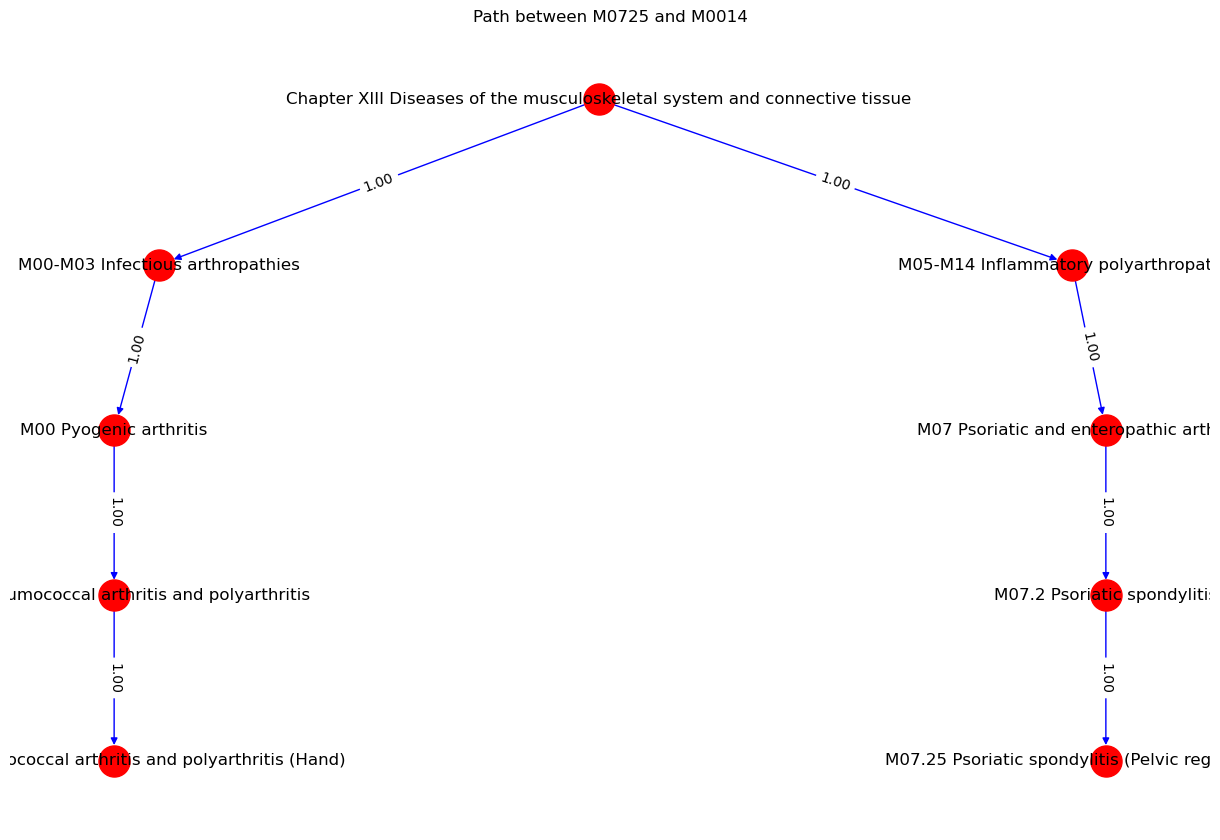

In [10]:
try:
    icd_tree.visualize_path(node1_coding, node2_coding)
except ValueError as e:
    print(e)

Distance between X271 and L298: 5.2


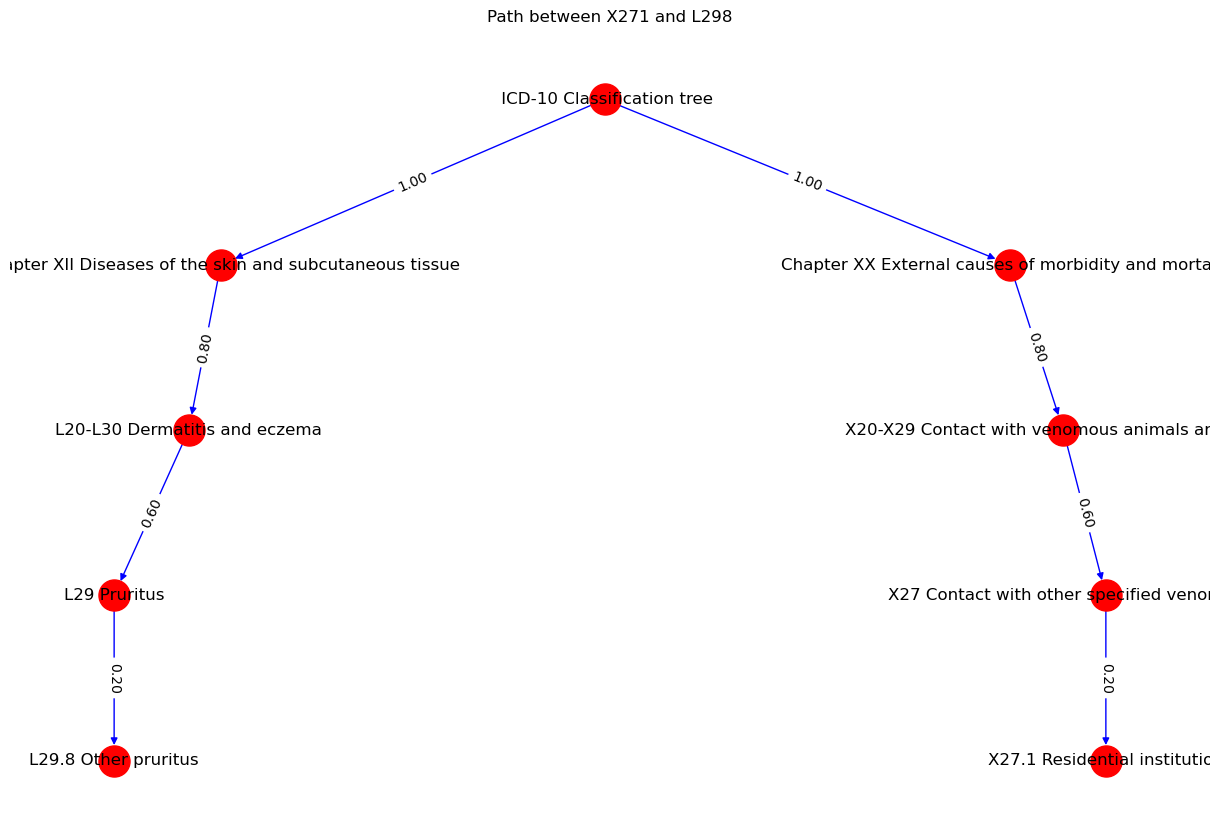

In [99]:
# Test: Initialize edge weights (depth-based and linear)
depth_weights = [1.0, 0.8, 0.5, 0.1, 0.1]
icd_tree.initialize_edge_weights(depth_weights)

try:
    distance = icd_tree.get_tree_distance(node1_coding, node2_coding)
    print(f"Distance between {node1_coding} and {node2_coding}: {distance}")
except ValueError as e:
    print(e)
    
try:
    icd_tree.visualize_path(node1_coding, node2_coding)
except ValueError as e:
    print(e)

Distance between X271 and L298: 5.84


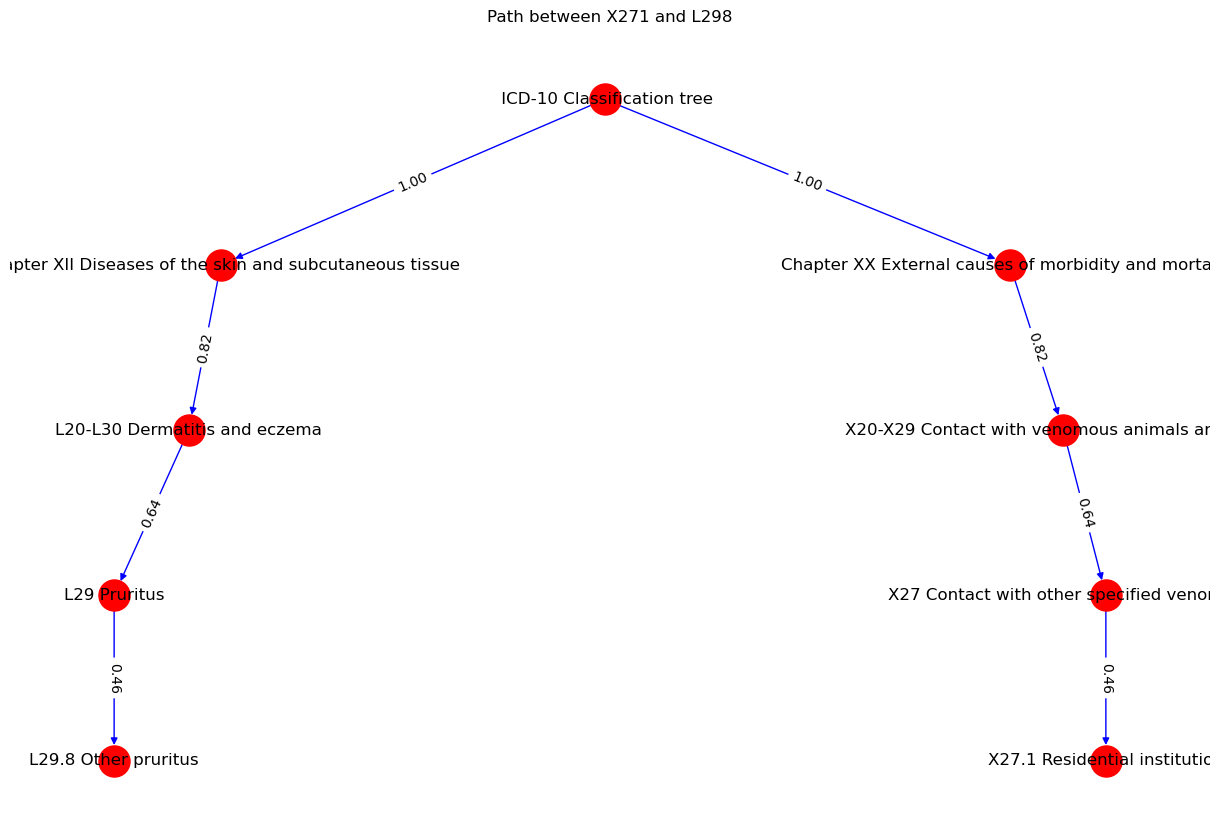

In [100]:
# Test: Linear edge weight initialization
icd_tree.initialize_edge_weights_linear(initial_weight=1.0, final_weight=0.1)

try:
    distance = icd_tree.get_tree_distance(node1_coding, node2_coding)
    print(f"Distance between {node1_coding} and {node2_coding}: {distance}")
except ValueError as e:
    print(e)
    
try:
    icd_tree.visualize_path(node1_coding, node2_coding)
except ValueError as e:
    print(e)